In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

In [6]:
n_cells = (3, 3)
coupling = [1,1,1]

qubits = n_cells[0] * n_cells[1]

lattice = 'triangle'

H_1 = qml.spin.heisenberg(lattice, (2,2), coupling, boundary_condition=True)
H_2 = qml.spin.heisenberg(lattice, (2,3), coupling, boundary_condition=True)
H_3 = qml.spin.heisenberg(lattice, (3,3), coupling, boundary_condition=True)

gs_1 = np.linalg.eigvalsh(H_1.matrix())[0]
gs_2 = np.linalg.eigvalsh(H_2.matrix())[0]
gs_3 = np.linalg.eigvalsh(H_3.matrix())[0]

## Load data

In [8]:
types = 'crx'

In [9]:
loc = "../local_data/TAFH_log1/"

energies_hee_1 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_1 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_1 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_1 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_1 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_1 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_1 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_1 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [10]:
loc = "../local_data/TAFH_log2/"

energies_hee_2 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_2 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_2 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_2 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_2 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_2 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_2 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_2 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [11]:
loc = "../local_data/TAFH_log3/"

energies_hee_3 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_3 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_3 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_3 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_3 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_3 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_3 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_3 = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [72]:
mean_loss_hee = np.mean(energies_hee, axis=1)
mean_loss_ng = np.mean(energies_ng, axis=1)

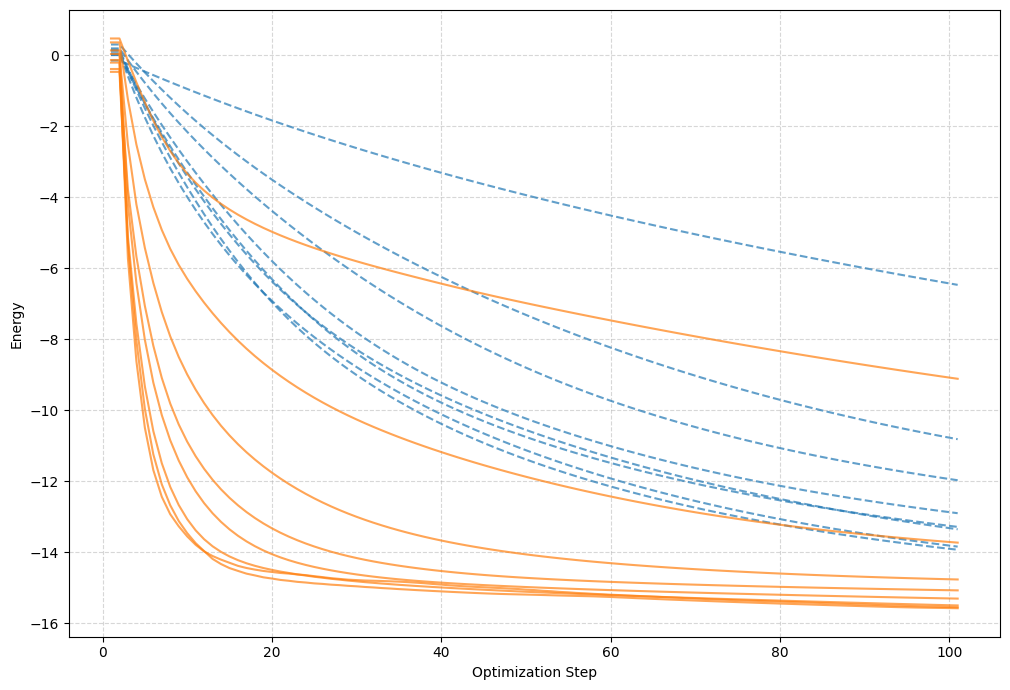

In [73]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_loss_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={2*(i+1)}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [12]:
layers = np.arange(2, 31, 4)

In [13]:
min_hee_1 = np.min(energies_hee_1[:,:,-1], axis=1)
min_ng_1 = np.min(energies_ng_1[:,:,-1], axis=1)

min_hee_2 = np.min(energies_hee_2[:,:,-1], axis=1)
min_ng_2 = np.min(energies_ng_2[:,:,-1], axis=1)

min_hee_3 = np.min(energies_hee_3[:,:,-1], axis=1)
min_ng_3 = np.min(energies_ng_3[:,:,-1], axis=1)

In [14]:
min_hee_1 - gs_1

array([3.10602021, 1.39833546, 0.94643736, 0.53350973, 0.45094299,
       0.23309422, 0.13949347, 0.09533262])

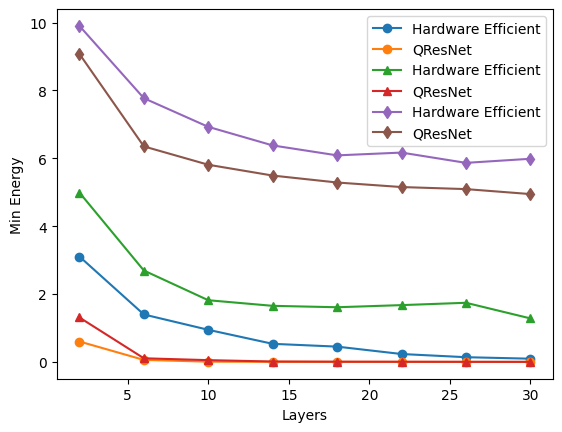

In [16]:
plt.plot(layers, min_hee_1 - gs_1, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng_1 - gs_1, marker='o', label='QResNet')
plt.plot(layers, min_hee_2 - gs_2, marker='^', label='Hardware Efficient')
plt.plot(layers, min_ng_2 - gs_2, marker='^', label='QResNet')
plt.plot(layers, min_hee_3 - gs_3, marker='d', label='Hardware Efficient')
plt.plot(layers, min_ng_3 - gs_3, marker='d', label='QResNet')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

/tmp/ipykernel_30020/2618201057.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', 4)


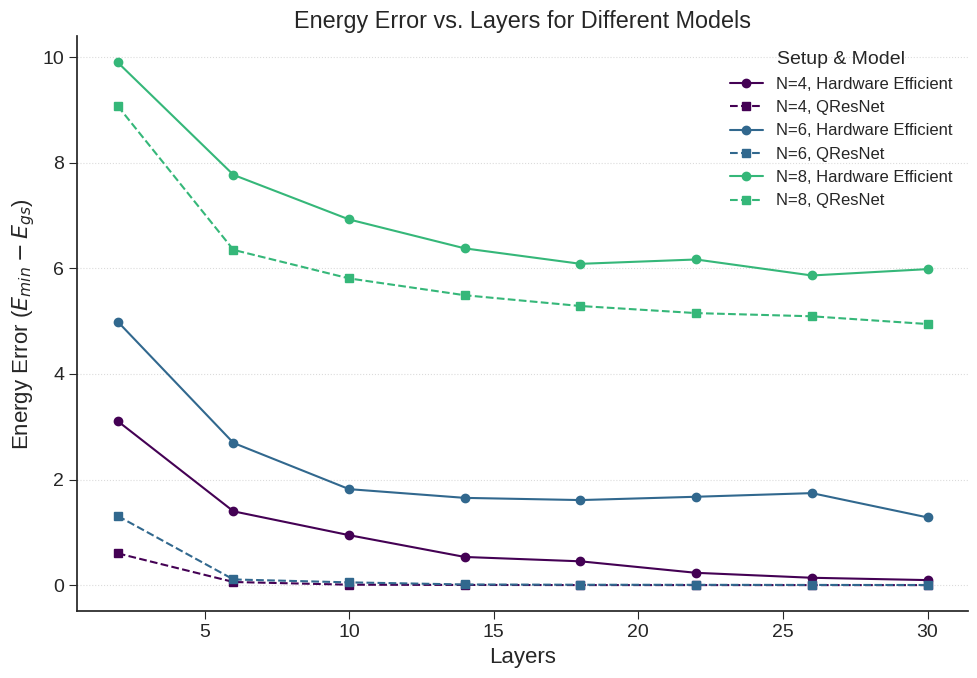

In [17]:
# --- 2. SETUP FOR ACADEMIC STYLE ---
plt.style.use('seaborn-v0_8-ticks')
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "legend.fontsize": 12,
    "figure.titlesize": 18
})

# --- 3. PLOTTING WITH LOGICAL GROUPING ---
fig, ax = plt.subplots(figsize=(10, 7))

# Define colors for each group (_1, _2, _3)
colors = plt.cm.get_cmap('viridis', 4)

# --- Group 1 (e.g., N=4 Qubits) ---
ax.plot(layers, min_hee_1 - gs_1, marker='o', linestyle='-', color=colors(0), label='N=4, Hardware Efficient')
ax.plot(layers, min_ng_1 - gs_1, marker='s', linestyle='--', color=colors(0), label='N=4, QResNet')

# --- Group 2 (e.g., N=6 Qubits) ---
ax.plot(layers, min_hee_2 - gs_2, marker='o', linestyle='-', color=colors(1), label='N=6, Hardware Efficient')
ax.plot(layers, min_ng_2 - gs_2, marker='s', linestyle='--', color=colors(1), label='N=6, QResNet')

# --- Group 3 (e.g., N=8 Qubits) ---
ax.plot(layers, min_hee_3 - gs_3, marker='o', linestyle='-', color=colors(2), label='N=8, Hardware Efficient')
ax.plot(layers, min_ng_3 - gs_3, marker='s', linestyle='--', color=colors(2), label='N=8, QResNet')

# --- 4. STYLE REFINEMENTS ---
ax.set_xlabel('Layers')
ax.set_ylabel(r'Energy Error ($E_{min} - E_{gs}$)') # Using LaTeX for a professional label
ax.set_title('Energy Error vs. Layers for Different Models')
ax.legend(title='Setup & Model')

# Improve grid and spines for a cleaner look
ax.grid(axis='y', linestyle=':', alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.show()

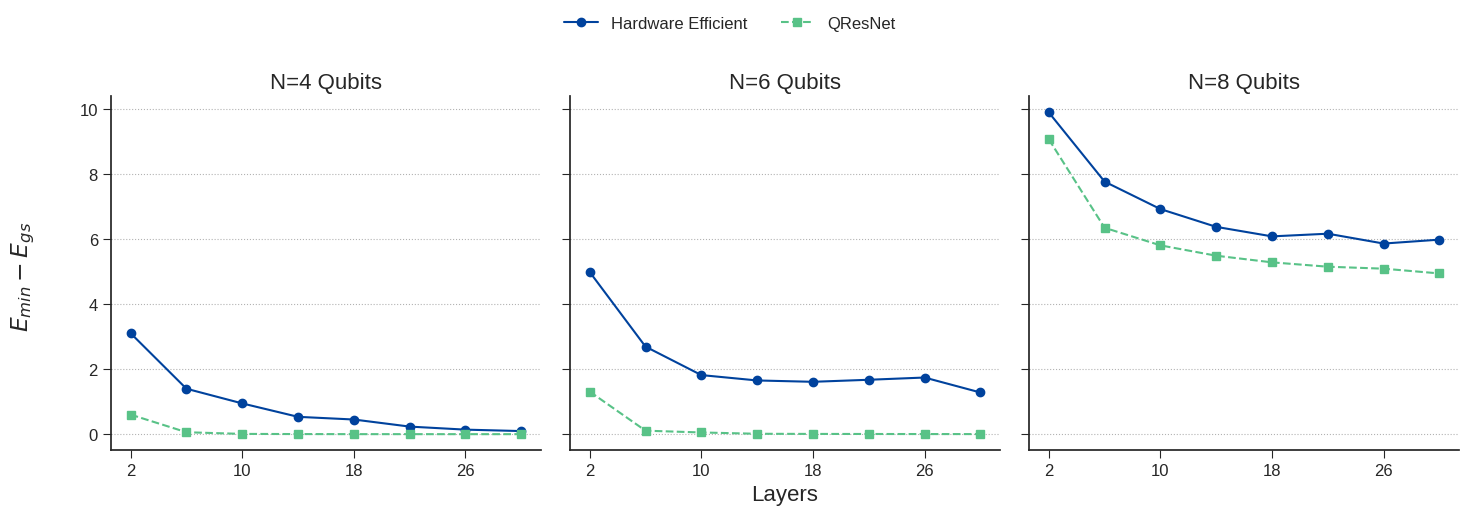

In [ ]:
# --- 3. CREATE THE SUBPLOTS ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# --- 4. PLOT DATA ON EACH AXIS ---
colors = ['#00429d', '#58c287']

# --- Subplot 1 (N=4 Qubits) ---
axes[0].plot(layers, min_hee_1 - gs_1, marker='o', linestyle='-', label='Hardware Efficient', color=colors[0])
axes[0].plot(layers, min_ng_1 - gs_1, marker='s', linestyle='--', label='QResNet', color=colors[1])
axes[0].set_title('N=4 Qubits')
# REMOVED: axes[0].legend()

# --- Subplot 2 (N=6 Qubits) ---
axes[1].plot(layers, min_hee_2 - gs_2, marker='o', linestyle='-', color=colors[0])
axes[1].plot(layers, min_ng_2 - gs_2, marker='s', linestyle='--', color=colors[1])
axes[1].set_title('N=6 Qubits')

# --- Subplot 3 (N=8 Qubits) ---
axes[2].plot(layers, min_hee_3 - gs_3, marker='o', linestyle='-', color=colors[0])
axes[2].plot(layers, min_ng_3 - gs_3, marker='s', linestyle='--', color=colors[1])
axes[2].set_title('N=8 Qubits')

# --- 5. GLOBAL STYLING AND LABELS ---
fig.supylabel(r'$E_{min} - E_{gs}$')
axes[1].set_xlabel('Layers')

for ax in axes:
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(axis='y', linestyle=':', color='gray', alpha=0.6)
    ax.set_xticks(layers[::2])

# --- 6. CREATE A SINGLE FIGURE-LEVEL LEGEND ---
# Get handles and labels from the first subplot to create the legend
handles, labels = axes[0].get_legend_handles_labels()
# Place the legend at the top of the figure, centered, with 2 columns
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.5, 1.05))

# Adjust layout to prevent titles/labels from overlapping and make space for legend
plt.tight_layout(rect=[0.02, 0, 1, 0.95])
plt.show()


In [77]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

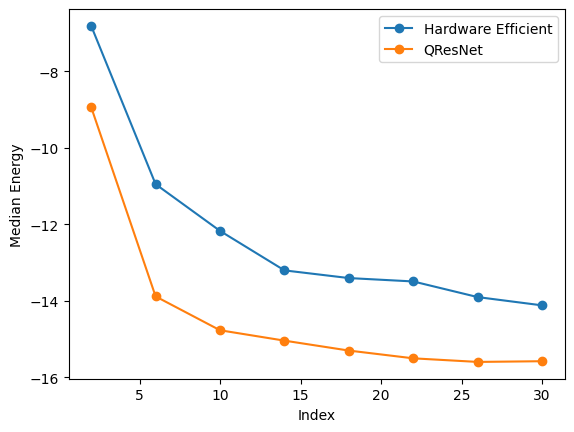

In [78]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()

In [79]:
mean_var_hee = np.mean(grad_variances_hee, axis=1)
mean_var_ng = np.mean(grad_variances_ng, axis=1)

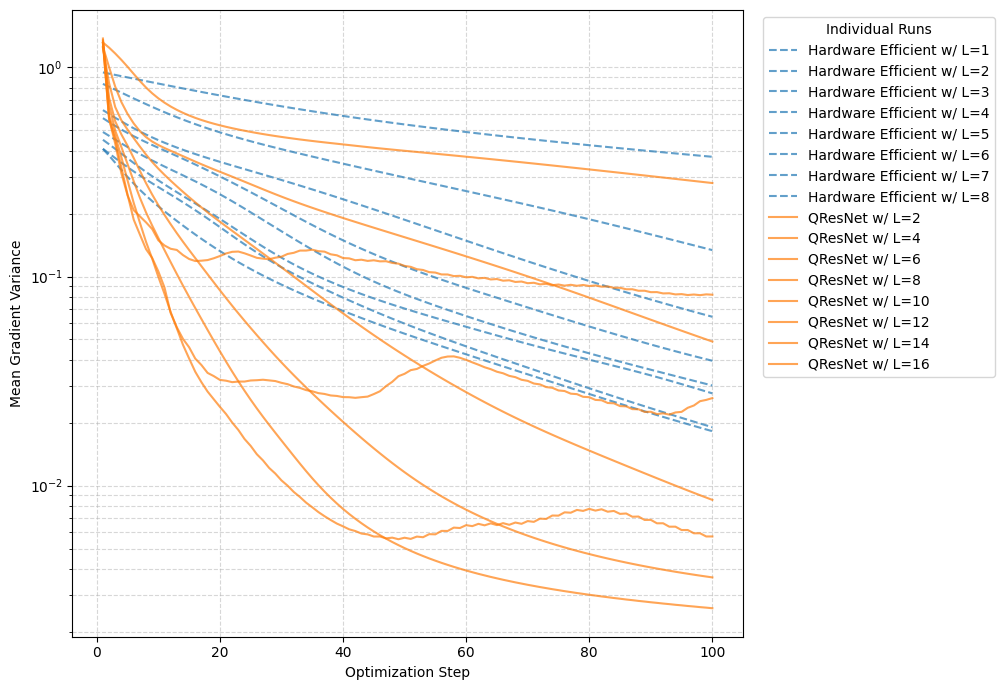

In [80]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_var_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_var_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={i+1}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_var_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.yscale('log')
plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()